In [1]:
import sys
import os
import matplotlib
import matplotlib.pyplot as plt


sys.path.append(r"C:\Users\pgrover\Documents\code\pymorph")
import weno_morph_model as wmm
import numpy as np
from scipy.signal import savgol_filter

%load_ext cython
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Morphological modelling for Paper 1

## 12 cm Flow Depth

### $k-\omega$ SST

In [34]:
simulationTime = 30
dt = 15

In [35]:
# Setting paths

casefolder = r'c:\Users\pgrover\Dropbox\PhD\Papers\Paper 1 - Application of OpenFoam to simulate the flow over fixed dunes\geometry'


bed_filepath = os.path.join(casefolder, 'flume_profile_v001.txt')
zbed, xc, dx = wmm.load_bed_profile(bed_filepath)


bed_shear_filepath = os.path.join(casefolder,'12cm', 'kwsst_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)



['ncols', '1']
['nrows', '194']
['xllcorner', '0']
['yllcorner', '0']
['cellsize', '0.002']
['NODATA_value', '-9999']


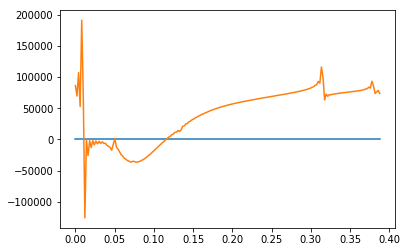

In [36]:
plt.plot(xc, np.flip(zbed,axis=0))
plt.plot(xc, bed_shear_stress* 100000.)

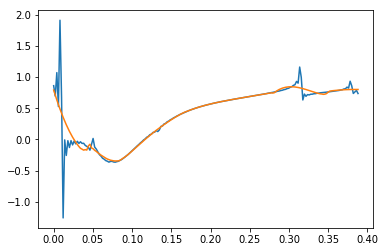

In [37]:
smoothed_bed_shear = savgol_filter(bed_shear_stress, 35,2)

plt.plot(xc, bed_shear_stress)

plt.plot(xc, smoothed_bed_shear)


In [38]:
D50 = 0.25/1000.

model = wmm.WenoMorphologicalModel(D50)
model.setup_model(smoothed_bed_shear, zbed, xc, dx)

 Starting simulation....
Number of time steps: 2
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.84419090228151
qbedload shape: (194,)
Max qbedload = 4.640616056102212e-06
 Done
 ----------------------------


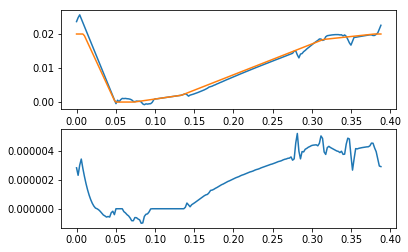

In [39]:
zc_kwsst_12cm, qbedload, bed_slope = model.run_model(simulationTime, dt=dt, useSlopeAdjust=True)

fig, axs = plt.subplots(2,1)
axs[0].plot(xc, zc_kwsst_12cm)
axs[0].plot(xc, zbed)

#axs[1].plot(xc, bed_shear_stress/1000.)
axs[1].plot(xc, qbedload)

### $k-\epsilon$

['ncols', '1']
['nrows', '194']
['xllcorner', '0']
['yllcorner', '0']
['cellsize', '0.002']
['NODATA_value', '-9999']


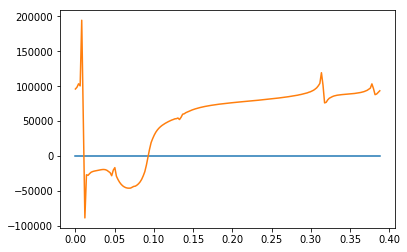

In [24]:
# Setting paths

casefolder = r'c:\Users\pgrover\Dropbox\PhD\Papers\Paper 1 - Application of OpenFoam to simulate the flow over fixed dunes\geometry'


bed_filepath = os.path.join(casefolder, 'flume_profile_v001.txt')
zbed, xc, dx = wmm.load_bed_profile(bed_filepath)


bed_shear_filepath = os.path.join(casefolder,'12cm', 'ke_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)

plt.plot(xc, np.flip(zbed,axis=0))
plt.plot(xc, bed_shear_stress* 100000.)

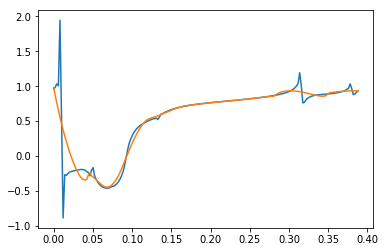

In [25]:
smoothed_bed_shear = savgol_filter(bed_shear_stress, 35,2)

plt.plot(xc, bed_shear_stress)

plt.plot(xc, smoothed_bed_shear)

D50 = 0.25/1000.

model = wmm.WenoMorphologicalModel(D50)
model.setup_model(smoothed_bed_shear, zbed, xc, dx)

 Starting simulation....
Number of time steps: 1
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.9783962898326899
qbedload shape: (194,)
Max qbedload = 6.361873139573273e-06
 Done
 ----------------------------


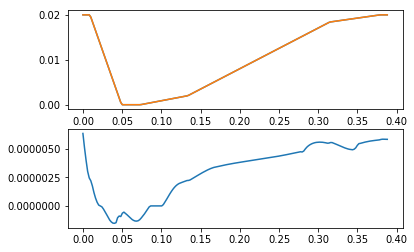

In [26]:
zc_ke_12cm, qbedload, bed_slope = model.run_model(simulationTime, dt=dt, useSlopeAdjust=True)

fig, axs = plt.subplots(2,1)
axs[0].plot(xc, zc_ke_12cm)
axs[0].plot(xc, zbed)

#axs[1].plot(xc, bed_shear_stress/1000.)
axs[1].plot(xc, qbedload)

## 6 cm Flow Depth

In [11]:
simulationTime = 100
dt = 0.5

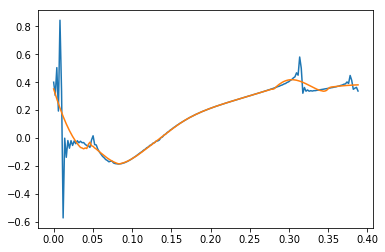

In [12]:
bed_shear_filepath = os.path.join(casefolder,'6cm', 'kwsst_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)

smoothed_bed_shear = savgol_filter(bed_shear_stress, 35,2)

plt.plot(xc, bed_shear_stress)

plt.plot(xc, smoothed_bed_shear)

D50 = 0.25/1000.

model = wmm.WenoMorphologicalModel(D50)
model.setup_model(smoothed_bed_shear, zbed, xc, dx)

 Starting simulation....
Number of time steps: 200
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.4179917304317342
qbedload shape: (194,)
Max qbedload = 9.782537406003862e-07
 Done
 ----------------------------


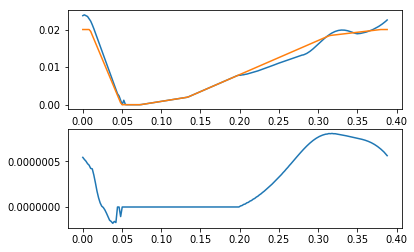

In [13]:
zc_kwsst_6cm, qbedload, bed_slope = model.run_model(simulationTime, dt=dt, useSlopeAdjust=True)

fig, axs = plt.subplots(2,1)
axs[0].plot(xc, zc_kwsst_6cm)
axs[0].plot(xc, zbed)

#axs[1].plot(xc, bed_shear_stress/1000.)
axs[1].plot(xc, qbedload)

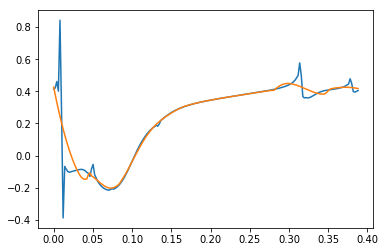

In [14]:
bed_shear_filepath = os.path.join(casefolder,'6cm', 'ke_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)

smoothed_bed_shear = savgol_filter(bed_shear_stress, 35,2)

plt.plot(xc, bed_shear_stress)

plt.plot(xc, smoothed_bed_shear)

D50 = 0.25/1000.

model = wmm.WenoMorphologicalModel(D50)
model.setup_model(smoothed_bed_shear, zbed, xc, dx)

 Starting simulation....
Number of time steps: 200
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.4487976286416327
qbedload shape: (194,)
Max qbedload = 1.2060457433015969e-06
 Done
 ----------------------------


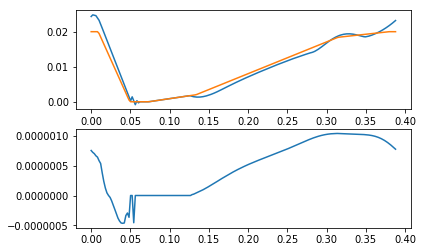

In [15]:
zc_ke_6cm, qbedload, bed_slope = model.run_model(simulationTime, dt=dt, useSlopeAdjust=True)

fig, axs = plt.subplots(2,1)
axs[0].plot(xc, zc_ke_6cm)
axs[0].plot(xc, zbed)

#axs[1].plot(xc, bed_shear_stress/1000.)
axs[1].plot(xc, qbedload)

## Results

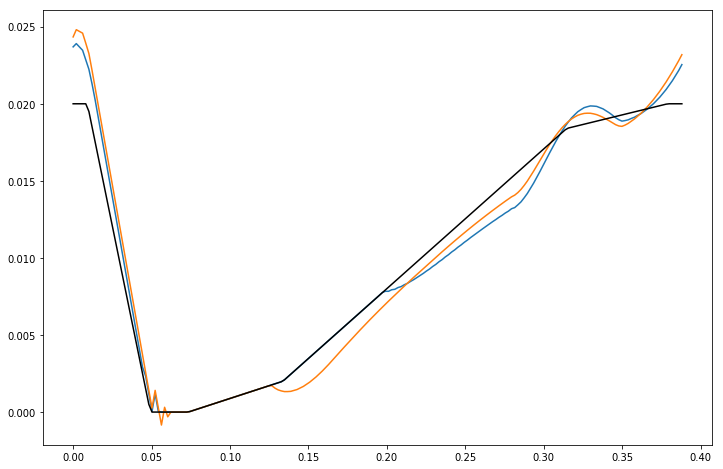

In [16]:
fig = plt.figure(figsize=[12,8])

plt.plot(xc, zc_kwsst_6cm)
plt.plot(xc, zc_ke_6cm)
plt.plot(xc, zbed, 'k')

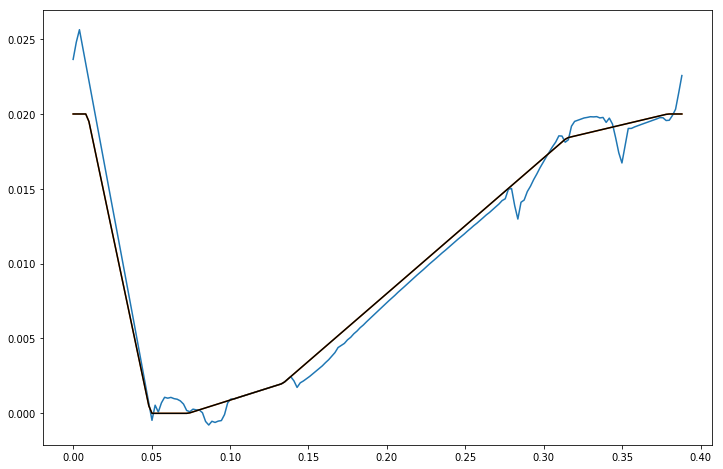

In [40]:
fig = plt.figure(figsize=[12,8])

plt.plot(xc, zc_kwsst_12cm)
plt.plot(xc, zc_ke_12cm)
plt.plot(xc, zbed, 'k')